In [1]:
import pandas as pd
df = pd.read_csv("thyroid_cancer_risk_data.csv")

In [2]:
df

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,212687,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,212688,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,212689,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,212690,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign


In [4]:
df = df.drop(df.columns[15], axis=1)

df = df.drop(df.columns[0], axis=1)



In [7]:
df

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Benign
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Benign
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Benign
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Benign
212687,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Benign
212688,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Benign
212689,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Benign


In [9]:
# List of categorical variables
one_hot_cols = ['Country', 'Ethnicity']  # OHE
binary_cols = ['Gender', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency',
               'Smoking', 'Obesity', 'Diabetes', 'Diagnosis']  # Binary


In [11]:
# Apply One-Hot Encoding
df_ohe = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)  # drop_first=True to avoid dummy variable trap

In [13]:
# Define manual binary mapping
binary_mapping = {"No": 0, "Yes": 1, "Male": 0, "Female": 1, "Benign": 0, "Malignant": 1}


In [15]:
df_ohe[binary_cols] = df_ohe[binary_cols].replace(binary_mapping).infer_objects(copy=False)


C:\Users\sakal\AppData\Local\Temp\ipykernel_33088\2425106404.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ohe[binary_cols] = df_ohe[binary_cols].replace(binary_mapping).infer_objects(copy=False)


In [16]:
# Display the transformed dataset
print(df_ohe.head())

   Age  Gender  Family_History  Radiation_Exposure  Iodine_Deficiency  \
0   66       0               0                   1                  0   
1   29       0               0                   1                  0   
2   86       0               0                   0                  0   
3   75       1               0                   0                  0   
4   35       1               1                   1                  0   

   Smoking  Obesity  Diabetes  TSH_Level  T3_Level  ...  Country_Japan  \
0        0        0         0       9.37      1.67  ...          False   
1        0        0         0       1.83      1.73  ...          False   
2        0        0         0       6.26      2.59  ...          False   
3        0        0         0       4.10      2.62  ...          False   
4        0        0         0       9.10      2.11  ...          False   

   Country_Nigeria  Country_Russia  Country_South Korea  Country_UK  \
0            False            True           

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
# Separate features (X) and response variable (y)
X = df_ohe.drop(columns=['Diagnosis'])  # Features
y = df_ohe['Diagnosis']  # Response variable

In [23]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Check the shape of the splits
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (170152, 25), Test set: (42539, 25)


In [27]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [28]:
# Apply SMOTE to balance the target variable y in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [31]:
# Display the class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())
print("\nClass distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution before SMOTE:
Diagnosis
0    130581
1     39571
Name: count, dtype: int64

Class distribution after SMOTE:
Diagnosis
1    130581
0    130581
Name: count, dtype: int64


In [33]:
from sklearn.preprocessing import StandardScaler


In [35]:
# Identify numerical columns to scale (modify as needed)
numerical_cols = ['Age', 'TSH_Level', 'T4_Level', 'T3_Level', 'Nodule_Size']  # Add other numerical columns as needed

In [37]:
# Initialize the scaler
scaler = StandardScaler()


In [39]:
# Fit the scaler on the training data and transform the features
X_train_smote[numerical_cols] = scaler.fit_transform(X_train_smote[numerical_cols])


In [41]:
# Apply the same transformation to the test set
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [43]:
# Check the scaled features (optional)
print(X_train_smote[numerical_cols].head())

        Age  TSH_Level  T4_Level  T3_Level  Nodule_Size
0 -1.611280   0.484948  0.664400  0.131257     0.168532
1  1.254895   0.222220  1.333284  1.552875    -0.797256
2  1.254895   0.358839  1.314704 -1.610225     0.525454
3  0.746380  -0.022992  1.542310 -0.081986     1.330277
4 -0.455564   0.978876  0.548274  1.623956    -1.623075


In [47]:
# Get unique values for all columns in X_train_smote
unique_values = {col: X_train_smote[col].unique().tolist() for col in X_train_smote.columns}

# Print them out
print("Unique values for all predictors in X_train_smote:")
for col, vals in unique_values.items():
    print(f"{col}: {vals}")


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Nodule_Size: [0.16853202431208467, -0.7972560026967077, 0.5254536864675078, 1.3302770423081682, -1.6230747504288634, 0.6444275738526488, 1.3022831864528408, -1.03520377746699, 0.5394506143951714, 1.1483169792485401, -0.9162298900818489, 0.434473654937694, -0.622294403600912, -1.525096254935218, 0.308501303588721, -1.560088574754377, 1.6522063846444324, -0.9232283540456807, -0.19538810180717042, 0.9873523080804085, -0.8952344981903534, 0.35049208737171206, -1.1751730567436265, -0.47532666036044363, 0.4554690468291894, -0.2443773495539934, -0.30036506126464807, 0.8613799567314354, 0.021564281071615985, 1.0783323396102222, -0.4543312684689481, -1.3921254396224132, -0.49632205225193915, 0.7284091414186308, -0.041421894602870366, -0.09740960631352504, 0.6934168215994717, 1.1903077630315315, -1.1191853450329718, 0.19652588016741168, -0.4683281963966118, 1.2882862585251769, -1.567087038718209, -0.3213604531561434, 1.6871987044635912, 1.624212528789105, 0.8753768846590991, 0.014565817107784306

In [49]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


In [51]:
# Define hyperparameter grid for XGBoost
xgb_param_grid = {
  'n_estimators': [100, 200],
  'learning_rate': [0.01, 0.1],
  'max_depth': [3, 5, 7],
  'subsample': [0.8, 1],
  'colsample_bytree': [0.8, 1]
}

In [53]:
# Perform Grid Search CV for XGBoost
xgb_grid_search = GridSearchCV(
  estimator=XGBClassifier(random_state=42,eval_metric='logloss'),
  param_grid=xgb_param_grid,
  cv=3,
  n_jobs=-1,
  scoring='f1',
  verbose=1
)

In [55]:
xgb_grid_search.fit(X_train_smote, y_train_smote)
best_xgb = xgb_grid_search.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\sakal\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sakal\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sakal\anaconda3\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\sakal\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1663, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                         

In [56]:
print("\n📌 Best Parameters for XGBoost:")
print(xgb_grid_search.best_params_)
print("Best F1 Score (CV):", xgb_grid_search.best_score_)


📌 Best Parameters for XGBoost:
{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best F1 Score (CV): 0.707709615194451


In [57]:
y_pred_train_xgb = best_xgb.predict(X_train_smote)
y_pred_xgb = best_xgb.predict(X_test)
from sklearn.metrics import classification_report
print("XGBoost Evaluation on Train Set:")
print(classification_report(y_train_smote, y_pred_train_xgb))

XGBoost Evaluation on Train Set:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81    130581
           1       0.87      0.69      0.77    130581

    accuracy                           0.79    261162
   macro avg       0.81      0.79      0.79    261162
weighted avg       0.81      0.79      0.79    261162



In [59]:
print("XGBoost (Tuned) Evaluation on Test Set:")
print(classification_report(y_test, y_pred_xgb))

XGBoost (Tuned) Evaluation on Test Set:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     32615
           1       0.56      0.47      0.51      9924

    accuracy                           0.79     42539
   macro avg       0.70      0.68      0.69     42539
weighted avg       0.78      0.79      0.78     42539



In [61]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

<Figure size 1000x600 with 0 Axes>

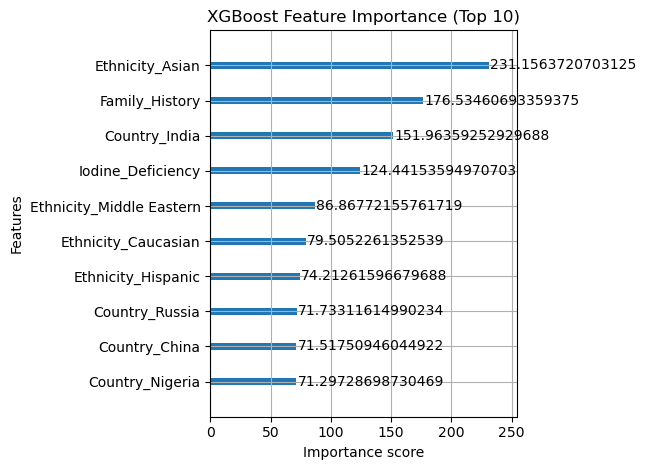

In [63]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(best_xgb, max_num_features=10, importance_type='gain', title='XGBoost Feature Importance (Top 10)')
plt.tight_layout()
plt.savefig("1.png") 
plt.show()

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
# Get feature importances as a pandas Series
importances = best_xgb.feature_importances_
features = X_train_smote.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

In [69]:
# Grouping by 'Country' and 'Ethnicity'
importance_df['Group'] = importance_df['Feature'].apply(
  lambda x: 'Country' if x.startswith('Country_') else (
    'Ethnicity' if x.startswith('Ethnicity_') else x))

In [71]:
# Summing importance by group
grouped_importance = importance_df.groupby('Group')['Importance'].sum().sort_values(ascending=False)

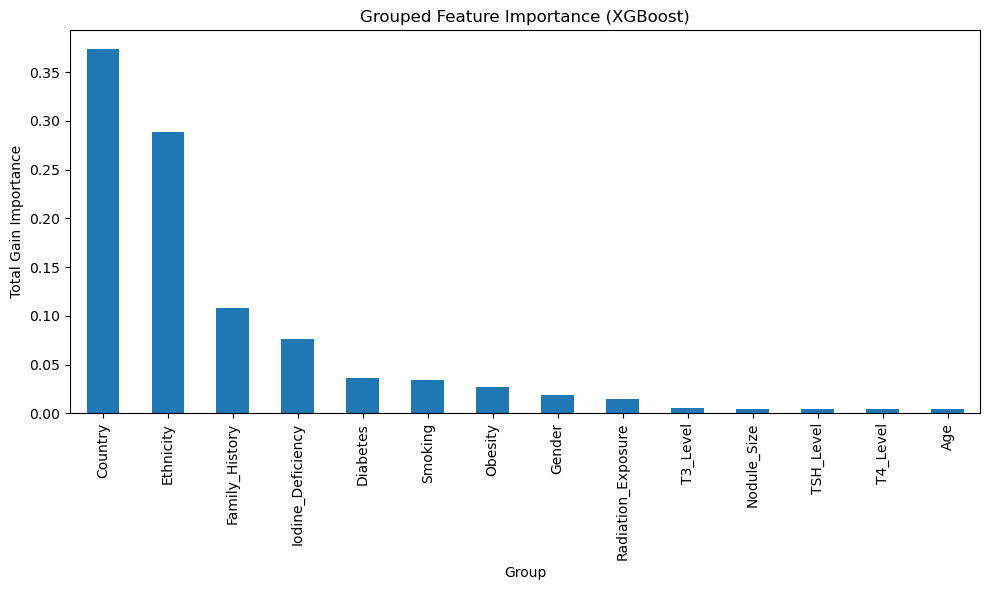

In [73]:
# Plot
plt.figure(figsize=(10, 6))
grouped_importance.plot(kind='bar')
plt.title('Grouped Feature Importance (XGBoost)')
plt.ylabel('Total Gain Importance')
plt.tight_layout()
plt.savefig("2.png") 
plt.show()

In [75]:
!pip install shap

In [77]:
import shap


In [79]:
print(X_train_smote.dtypes)

Age                         float64
Gender                        int64
Family_History                int64
Radiation_Exposure            int64
Iodine_Deficiency             int64
Smoking                       int64
Obesity                       int64
Diabetes                      int64
TSH_Level                   float64
T3_Level                    float64
T4_Level                    float64
Nodule_Size                 float64
Country_China                  bool
Country_Germany                bool
Country_India                  bool
Country_Japan                  bool
Country_Nigeria                bool
Country_Russia                 bool
Country_South Korea            bool
Country_UK                     bool
Country_USA                    bool
Ethnicity_Asian                bool
Ethnicity_Caucasian            bool
Ethnicity_Hispanic             bool
Ethnicity_Middle Eastern       bool
dtype: object


100%|===================| 261129/261162 [502:35<00:03]         

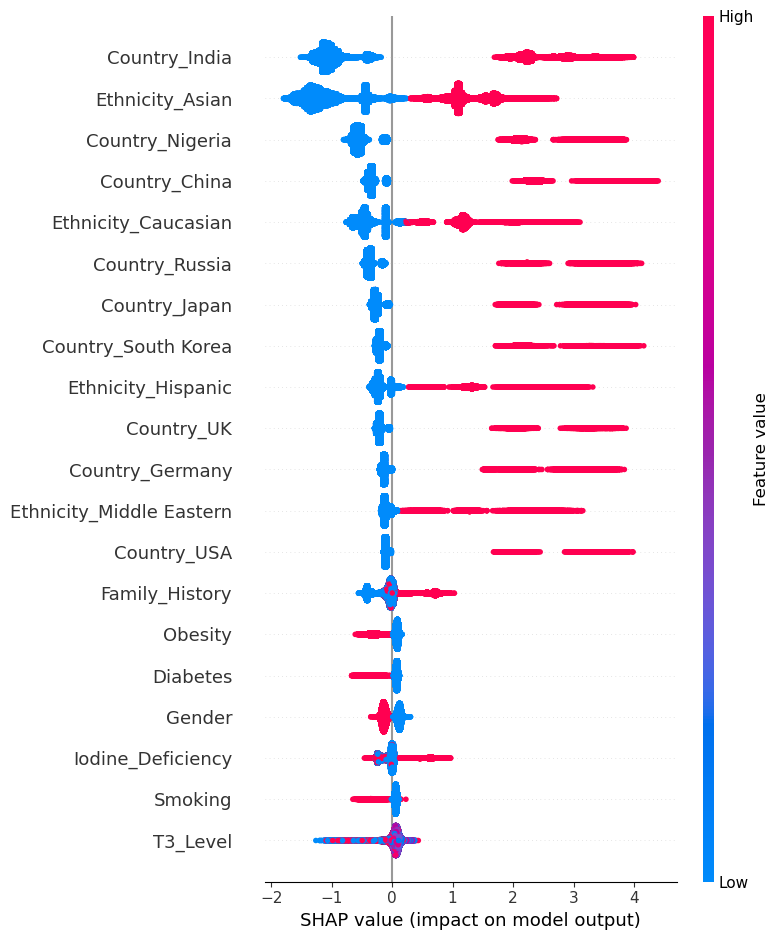

In [83]:
import pandas as pd
import shap

# Check for missing values and handle them (imputation)
X_train_smote.fillna(X_train_smote.mean(), inplace=True)  # Mean imputation for missing values

# Convert boolean columns to integers
X_train_smote = X_train_smote.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

# Ensure all columns are numeric
X_train_smote = X_train_smote.apply(pd.to_numeric, errors='raise')

# Initialize the SHAP explainer for XGBoost
explainer = shap.Explainer(best_xgb, X_train_smote)

# Compute SHAP values for the entire training set
shap_values = explainer(X_train_smote)

# Optionally, you can plot the SHAP summary plot
shap.summary_plot(shap_values, X_train_smote)


In [81]:
plt.savefig("shap_summary_plot.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [ ]:
# Use original (non-SMOTEd) training data just for SHAP interpretation
explainer_real = shap.Explainer(best_xgb, X_train_original)
shap_values_real = explainer_real(X_train_original)
shap.summary_plot(shap_values_real, X_train_original)
plt.savefig("shap_summary_plot_real.png", dpi=300, bbox_inches='tight')

In [204]:
import shap
import matplotlib.pyplot as plt


KeyboardInterrupt: 

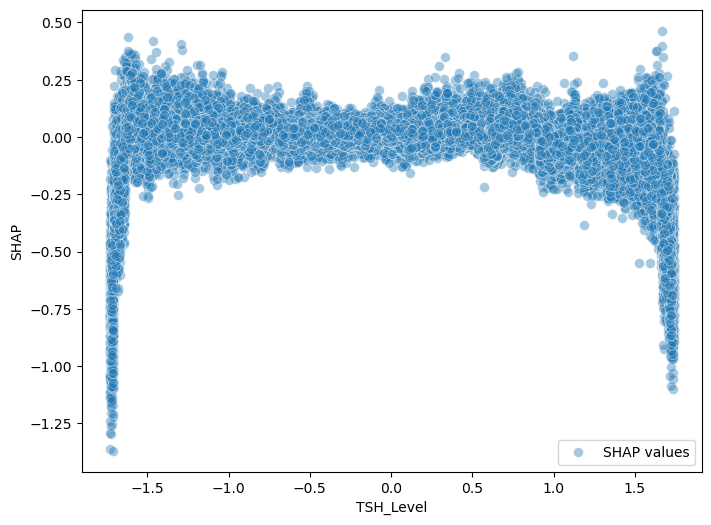

In [282]:

import shap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract SHAP values for the feature
feature = "TSH_Level"
shap_vals = shap_values[:, feature].values  # SHAP values for TSH_Level
feature_vals = X_train_smote[feature]       # Actual feature values

# Create a DataFrame for plotting
df = pd.DataFrame({
    feature: feature_vals,
    "SHAP": shap_vals
})

# Plot the scatter (dependence) and the trend line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=feature, y="SHAP", data=df, alpha=0.4, label="SHAP values", s=50)
sns.regplot(x=feature, y="SHAP", data=df, scatter=False, color="red", label="Trend (linear)", lowess=True)

plt.title(f"SHAP Dependence Plot with Trend Line: {feature}")
plt.xlabel(f"{feature} (Feature Value)")
plt.ylabel("SHAP Value")
plt.legend()
plt.tight_layout()
plt.savefig("shap_dependence_with_trend_TSH.png", dpi=300)
plt.show()



In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get SHAP values for 'Family_History'
fam_hist_shap = shap_values.values[:, X_train_smote.columns.get_loc("Family_History")]

# Plot
sns.stripplot(x="Family_History", y=fam_hist_shap, data=X_train_smote.assign(Family_History=X_train_smote["Family_History"]),
              jitter=0.25, palette="Set2", hue="Family_History", dodge=False, legend=False)

plt.xlabel("Family History (0 = No, 1 = Yes)")
plt.ylabel("SHAP value for Family History")
plt.title("SHAP Values by Family History")
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig("shap_fam_hist_strip.png", dpi=300, bbox_inches='tight')
plt.clf()



<Figure size 640x480 with 0 Axes>

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get SHAP values for 'Iodine_Deficiency'
iod_def_shap = shap_values.values[:, X_train_smote.columns.get_loc("Iodine_Deficiency")]

# Plot
sns.stripplot(x="Iodine_Deficiency", y=iod_def_shap, data=X_train_smote.assign(Iodine_Deficiency=X_train_smote["Iodine_Deficiency"]),
              jitter=0.25, palette="Set2", hue="Iodine_Deficiency", dodge=False, legend=False)

plt.xlabel("Iodine Deficiency (0 = No, 1 = Yes)")
plt.ylabel("SHAP value for Iodine Deficiency")
plt.title("SHAP Values by Iodine Deficiency")
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig("shap_iod_def_strip.png", dpi=300, bbox_inches='tight')
plt.clf()


<Figure size 640x480 with 0 Axes>

In [292]:
eth_cols = [col for col in X_train_smote.columns if col.startswith("Ethnicity_")]


In [298]:
# Recombine into one 'Ethnicity' column
def get_ethnicity(row):
    for col in eth_cols:
        if row[col] == 1:
            return col.replace("Ethnicity_", "")
    return "Unknown"

X_plot = X_train_smote.copy()
X_plot["Ethnicity"] = X_train_smote[eth_cols].apply(get_ethnicity, axis=1)

# Get SHAP values for all 4 ethnicity columns, and sum them
eth_shap_total = shap_values.values[:, [X_train_smote.columns.get_loc(c) for c in eth_cols]].sum(axis=1)

# Plot!
sns.stripplot(x="Ethnicity", y=eth_shap_total, data=X_plot,
              jitter=0.25, palette="Set2")

plt.xlabel("Ethnicity")
plt.ylabel("SHAP value")
plt.title("SHAP Values by Ethnicity")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("shap_ethnicity_combined.png", dpi=300, bbox_inches='tight')
plt.clf()

X_plot["Ethnicity"].value_counts()

X_plot.loc[X_plot["Ethnicity"] == "Unknown", eth_cols]

X_plot_filtered = X_plot[X_plot["Ethnicity"] != "Unknown"]
eth_shap_filtered = eth_shap_total[X_plot["Ethnicity"] != "Unknown"]

sns.stripplot(x="Ethnicity", y=eth_shap_filtered, data=X_plot_filtered,
              jitter=0.25, palette="Set2")

plt.xlabel("Ethnicity")
plt.ylabel("SHAP value")
plt.title("SHAP Values by Ethnicity")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("shap_ethnicity_combined_clean.png", dpi=300, bbox_inches='tight')
plt.clf()

C:\Users\sakal\AppData\Local\Temp\ipykernel_15968\4145957038.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Ethnicity", y=eth_shap_total, data=X_plot,
C:\Users\sakal\AppData\Local\Temp\ipykernel_15968\4145957038.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Ethnicity", y=eth_shap_filtered, data=X_plot_filtered,


<Figure size 640x480 with 0 Axes>

In [332]:
cont_cols = [col for col in X_train_smote.columns if col.startswith("Country_")]


In [336]:
# Recombine into one 'Country' column
def get_country(row):
    for col in cont_cols:
        if row[col] == 1:
            return col.replace("Country_", "")
    return "Unknown"

X_plot = X_train_smote.copy()
X_plot["Country"] = X_train_smote[cont_cols].apply(get_country, axis=1)

# Get SHAP values for all 4 ethnicity columns, and sum them
cont_shap_total = shap_values.values[:, [X_train_smote.columns.get_loc(c) for c in cont_cols]].sum(axis=1)

# Plot!
sns.stripplot(x="Country", y=cont_shap_total, data=X_plot,
              jitter=0.25, palette="Set2")

plt.xlabel("Country")
plt.ylabel("SHAP value")
plt.title("SHAP Values by Country")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("shap_country_combined.png", dpi=300, bbox_inches='tight')
plt.clf()

X_plot["Country"].value_counts()

X_plot.loc[X_plot["Country"] == "Unknown", cont_cols]

X_plot_filtered = X_plot[X_plot["Country"] != "Unknown"]
cont_shap_filtered = cont_shap_total[X_plot["Country"] != "Unknown"]

sns.stripplot(x="Country", y=cont_shap_filtered, data=X_plot_filtered,
              jitter=0.25, palette="Set2")

plt.xlabel("Country")
plt.ylabel("SHAP value")
plt.title("SHAP Values by Country")
plt.xticks(rotation=45, ha='right', fontsize=8)  # 👈 Rotate + shrink font size
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("shap_country_combined_clean.png", dpi=300, bbox_inches='tight')
plt.clf()


C:\Users\sakal\AppData\Local\Temp\ipykernel_15968\953387428.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Country", y=cont_shap_total, data=X_plot,
C:\Users\sakal\AppData\Local\Temp\ipykernel_15968\953387428.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Country", y=cont_shap_filtered, data=X_plot_filtered,


<Figure size 640x480 with 0 Axes>

In [302]:
from sklearn.cluster import KMeans
import pandas as pd

subset_idx = X_plot["Ethnicity"] == "Asian"
eth_shap_subset = eth_shap_total[subset_idx]

# You can cluster just the SHAP values or a few related SHAP columns
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(eth_shap_subset.reshape(-1, 1))


In [304]:
# Add the cluster labels back to your subset
subset_features = X_train_smote.loc[subset_idx]
subset_features["cluster"] = cluster_labels

# Now your dataframe has the cluster labels, and we can compare features across the clusters.


C:\Users\sakal\AppData\Local\Temp\ipykernel_15968\243194336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_features["cluster"] = cluster_labels


C:\Users\sakal\AppData\Local\Temp\ipykernel_15968\4130192854.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="cluster", y="Family_History", data=subset_features, hue="cluster", ci=None)


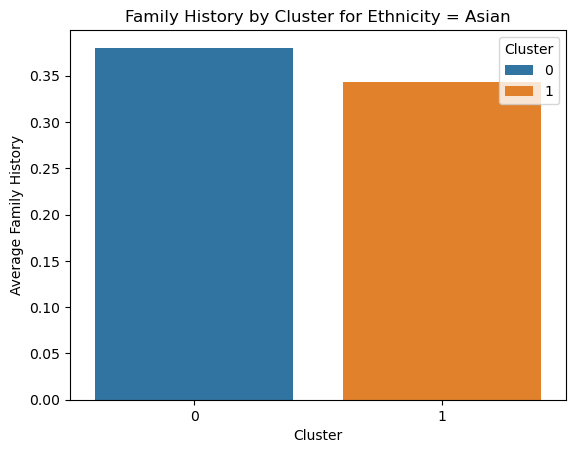

In [328]:
# Grouped bar plot to see Family History by cluster
sns.barplot(x="cluster", y="Family_History", data=subset_features, hue="cluster", ci=None)
plt.title("Family History by Cluster for Ethnicity = Asian")
plt.ylabel("Average Family History")
plt.xlabel("Cluster")
plt.legend(title="Cluster")
plt.show()



In [308]:
# Descriptive statistics for each cluster
cluster_stats = subset_features.groupby("cluster").describe()
print(cluster_stats)


             Age                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        77098.0 -0.000886  0.999681 -1.703737 -0.871622  0.006722  0.885066   
1         8890.0  0.008048  1.014465 -1.703737 -0.871622  0.006722  0.885066   

                    Gender            ... Ethnicity_Hispanic       \
              max    count      mean  ...                75%  max   
cluster                               ...                           
0        1.717182  77098.0  0.545786  ...                0.0  0.0   
1        1.717182   8890.0  0.521710  ...                1.0  1.0   

        Ethnicity_Middle Eastern                                               
                           count      mean       std  min  25%  50%  75%  max  
cluster                                                                        
0            

In [ ]:
# Visualizing SHAP values by cluster
sns.boxplot(x="cluster", y="eth_shap", data=subset_features)
plt.title("SHAP Value by Cluster for Ethnicity = Asian")
plt.show()


In [ ]:
# For example, comparing TSH Level by Cluster
sns.lineplot(x="TSH_Level", y="eth_shap", hue="cluster", data=subset_features)
plt.title("SHAP Values for Ethnicity = Asian by TSH Level (Clustered)")
plt.show()


In [296]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true feature names from SHAP object (just in case order or names got mangled)
shap_feature_names = shap_values.feature_names if hasattr(shap_values, "feature_names") else X_train_smote.columns.tolist()

# Get the Ethnicity column names from SHAP
eth_cols = [col for col in shap_feature_names if col.startswith("Ethnicity_")]

# Get column indices in the shap_values array
eth_indices = [shap_feature_names.index(col) for col in eth_cols]

# Reconstruct original ethnicity label from SHAP's view
X_plot = pd.DataFrame(shap_values.data, columns=shap_feature_names)

def get_ethnicity(row):
    for col in eth_cols:
        if row[col] == 1:
            return col.replace("Ethnicity_", "")
    return "Unknown"

X_plot["Ethnicity"] = X_plot[eth_cols].apply(get_ethnicity, axis=1)

# Sum SHAP values for ethnicity
eth_shap_total = shap_values.values[:, eth_indices].sum(axis=1)

# Plot!
sns.stripplot(x="Ethnicity", y=eth_shap_total, data=X_plot,
              jitter=0.25, palette="Set2")

plt.xlabel("Ethnicity")
plt.ylabel("SHAP value")
plt.title("SHAP Values by Ethnicity")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("shap_ethnicity_combined_shapsource.png", dpi=300, bbox_inches='tight')
plt.clf()


C:\Users\sakal\AppData\Local\Temp\ipykernel_15968\3792138271.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Ethnicity", y=eth_shap_total, data=X_plot,


<Figure size 640x480 with 0 Axes>

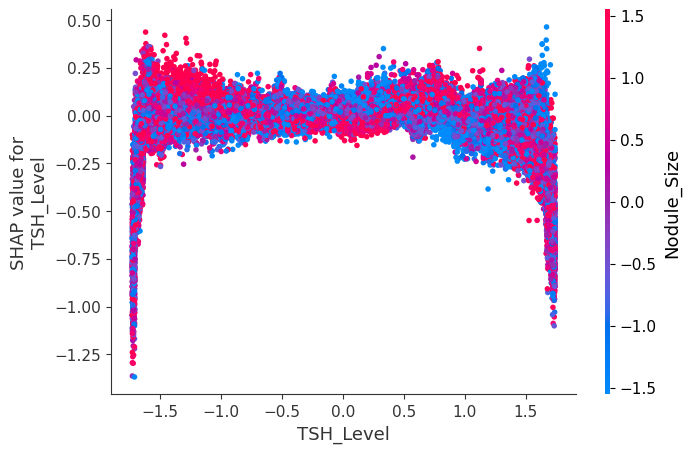

In [226]:
shap.dependence_plot("TSH_Level", shap_values.values, X_train_smote)
# with interaction color:
shap.dependence_plot("TSH_Level", shap_values.values, X_train_smote, interaction_index="Nodule")


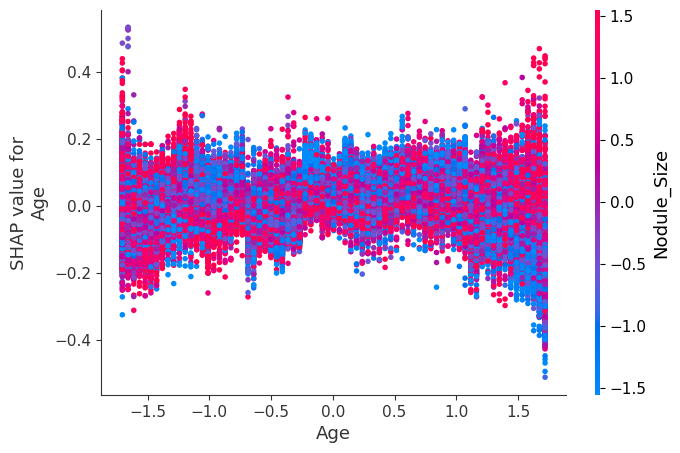

In [228]:
shap.dependence_plot("Age", shap_values.values, X_train_smote, interaction_index="Nodule_Size")

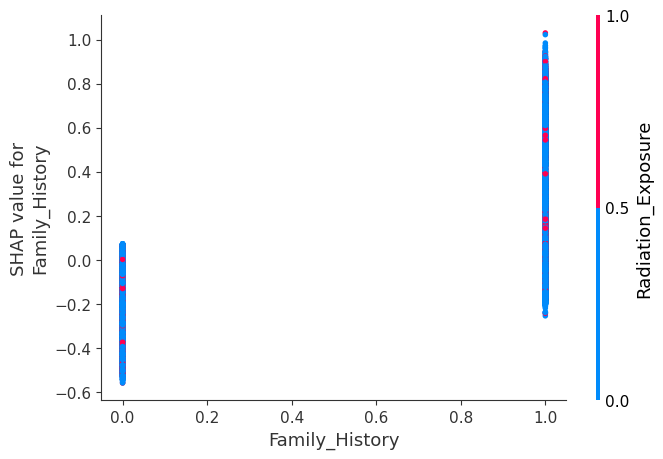

In [266]:
dependence_plot=shap.dependence_plot("Family_History", shap_values.values, X_train_smote, interaction_index="Radiation_Exposure")


In [238]:
import shap

# Generate the force plot for the first instance
force_plot = shap.plots.force(
    explainer.expected_value,
    shap_values.values[0],
    X_train_smote.iloc[0]
)

# Save as HTML
shap.save_html("shap_force_plot_instance_0.html", force_plot)



In [268]:
import shap

# Generate the force plot for the 4423th instance
force_plot_4423 = shap.plots.force(
    explainer.expected_value,
    shap_values.values[4423],
    X_train_smote.iloc[4423]
)

# Save as HTML
shap.save_html("shap_force_plot_instance_4423.html", force_plot_4423)


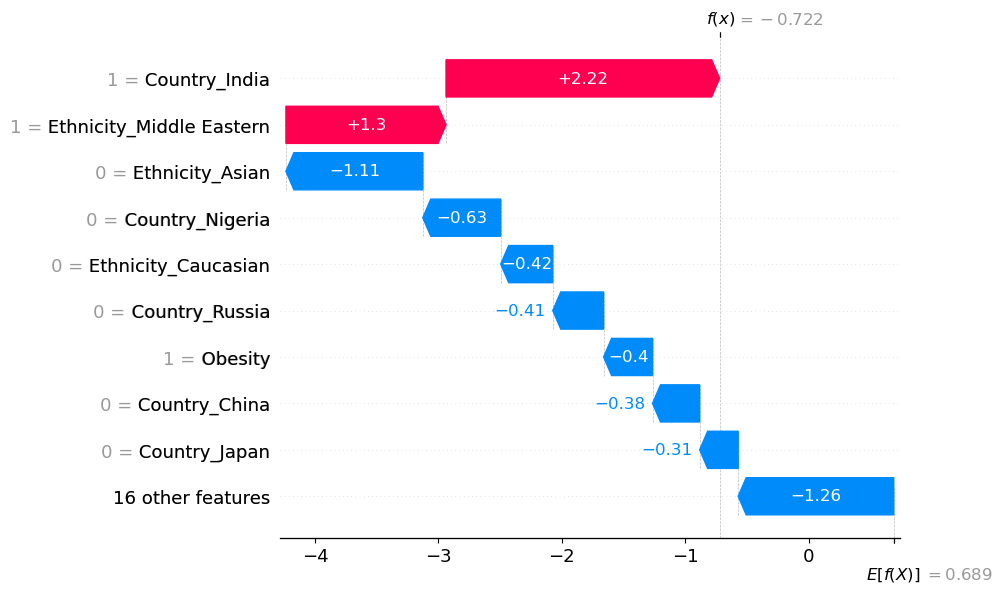

In [262]:
import matplotlib.pyplot as plt
import shap

# Generate the waterfall plot for the first instance
shap.plots.waterfall(shap_values[0])

# Save the plot as an image (e.g., PNG)
plt.savefig("shap_waterfall_plot_instance_0.pdf", dpi=300, bbox_inches='tight')

# Close the plot to avoid showing it
plt.close()



In [276]:


# For the feature 'iodine'
shap.summary_plot(shap_values[:, 'Iodine_Deficiency'], X_train_smote)
plt.savefig("shap_iodine.png", dpi=300, bbox_inches='tight')
plt.clf()


AssertionError: Summary plots need a matrix of shap_values, not a vector.

<Figure size 640x480 with 0 Axes>

In [92]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt


In [100]:
from collections import Counter


In [102]:
group_map = {
    col: 'Country' if col.startswith('Country_') else
         'Ethnicity' if col.startswith('Ethnicity_') else
         col
    for col in X_train_smote.columns
}

In [104]:
print("Feature grouping:", dict(Counter(group_map.values())))

Feature grouping: {'Age': 1, 'Gender': 1, 'Family_History': 1, 'Radiation_Exposure': 1, 'Iodine_Deficiency': 1, 'Smoking': 1, 'Obesity': 1, 'Diabetes': 1, 'TSH_Level': 1, 'T3_Level': 1, 'T4_Level': 1, 'Nodule_Size': 1, 'Country': 9, 'Ethnicity': 4}


In [112]:
# Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_values.values, columns=X_train_smote.columns)

In [114]:
# Group SHAP values
shap_df_grouped = pd.DataFrame(index=shap_df.index)
for group in set(group_map.values()):
    cols_in_group = [col for col in X_train_smote.columns if group_map[col] == group]
    if len(cols_in_group) > 1:
        shap_df_grouped[group] = shap_df[cols_in_group].sum(axis=1)
    else:
        shap_df_grouped[group] = shap_df[cols_in_group[0]]


In [116]:
print("Grouped SHAP DataFrame shape:", shap_df_grouped.shape)


Grouped SHAP DataFrame shape: (261162, 14)


In [ ]:
plt.figure()
shap.summary_plot(shap_df_grouped.values, features=shap_df_grouped, feature_names=shap_df_grouped.columns, show=False)
plt.title("SHAP Summary Plot")
plt.savefig("summary_grouped.png", bbox_inches='tight')
plt.close()

In [162]:
country_cols = [col for col in X_train_smote.columns if col.startswith('Country_')]
if not country_cols:
    raise ValueError("No one-hot encoded Country columns found.")


In [164]:
shap_df = pd.DataFrame(shap_values.values, columns=X_train_smote.columns)
shap_country = shap_df[country_cols]


In [166]:
# Ensure the 'Country' column is converted to numeric or categorical mapping
country_actual = X_train_smote[country_cols].idxmax(axis=1)
country_actual_clean = country_actual.astype('category').cat.codes  # Encoding categories

chosen_country_col = country_cols[0]  # or any specific one if you want


In [178]:

# Ensure country_actual_clean is numeric (e.g., label encoded if it's categorical)
# You can use LabelEncoder if it's categorical and needs to be converted to numeric values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
country_actual_clean_encoded = le.fit_transform(country_actual_clean)


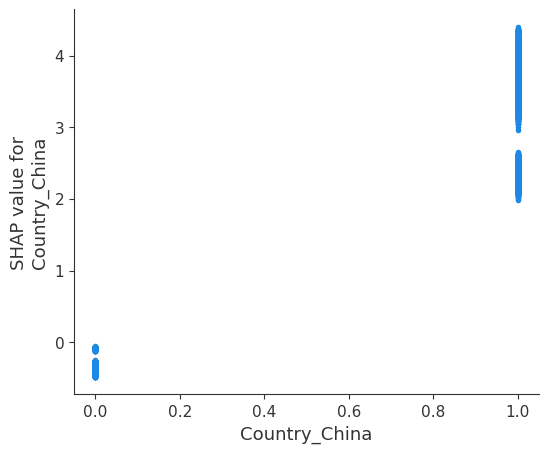

In [180]:
# Create the plot without using the 'c' argument
shap.dependence_plot(
    ind=chosen_country_col,         # X-axis: SHAP value of one country
    shap_values=shap_df.values,      # Full SHAP values
    features=X_train_smote,         # Original feature matrix
    interaction_index=None,
    show=False
)


In [182]:
# Now, plot manually with custom coloring using 'matplotlib'
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [186]:

# Extract the SHAP values for the chosen feature
shap_values_for_feature = shap_df[chosen_country_col].values


In [188]:
# Create the plot
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

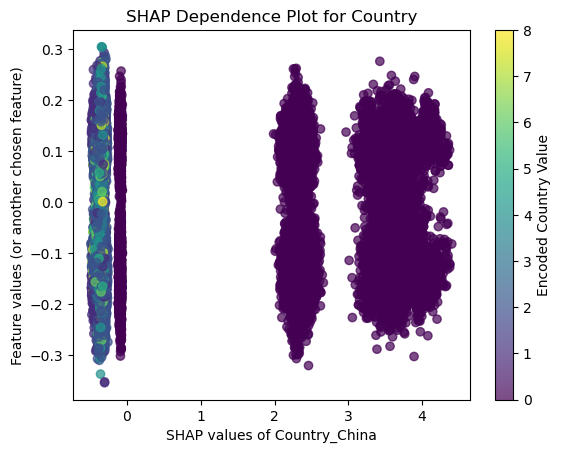

In [190]:

# Plot the dependence plot manually with custom coloring using 'matplotlib'
scatter = plt.scatter(
    shap_values_for_feature,        # X values (SHAP values of chosen feature)
    shap_df.iloc[:, 1].values,      # Y values (you can choose another column for the Y-axis)
    c=country_actual_clean_encoded, # Color by the encoded country variable
    cmap='viridis',                 # Using a colormap for numeric categories
    alpha=0.7
)

# Adding a color bar
plt.colorbar(scatter, label="Encoded Country Value")
plt.title("SHAP Dependence Plot for Country")
plt.xlabel(f"SHAP values of {chosen_country_col}")
plt.ylabel("Feature values (or another chosen feature)")
plt.savefig("dependence_country_categorical.png", bbox_inches='tight')
plt.show()

In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

In [192]:
# Function to extract the original feature value (e.g., which country)
def get_original_category(row, columns):
    for col in columns:
        if row[col] == 1:
            return col.split('_', 1)[1]  # get value after underscore
    return 'Unknown'

In [194]:

# For each group
for group_name, cols in groupings.items():
    # 1. Sum SHAP values across all one-hot columns in the group
    group_shap = shap_df[cols].sum(axis=1)

    # 2. Recreate the original variable (e.g., 'India', 'UK', etc.)
    X_group_val = X_df[cols].apply(lambda row: get_original_category(row, cols), axis=1)

    # 3. Create a DataFrame for plotting
    group_plot_df = pd.DataFrame({
        group_name: X_group_val,
        'SHAP Value': group_shap
    })

    # 4. Plot!
    plt.figure(figsize=(10, 5))
    sns.stripplot(data=group_plot_df, x=group_name, y='SHAP Value', jitter=True, alpha=0.5)
    plt.title(f"SHAP Dependence Plot for {group_name}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


NameError: name 'groupings' is not defined

In [196]:
# SHAP force plot (requires Jupyter, looks great inline)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, X_train_smote.iloc[0])

In [198]:
import shap

# Generate the force plot
force_plot = shap.force_plot(explainer.expected_value, shap_values[0].values, X_train_smote.iloc[0])

# Save as HTML file
shap.save_html("shap_force_plot.html", force_plot)


In [200]:

# Function to create SHAP mean bar plots by category
def shap_cat_plot(features):
  if features not in X_train_smote.columns:
    print(f"Feature '{features}' not found in X_train_smote.")
  return


In [202]:
# Access SHAP values for the specific feature using .values
shap_vals = shap_values[:, X_train_smote.columns.get_loc(feature_name)].values


NameError: name 'feature_name' is not defined